<a href="https://colab.research.google.com/github/m4gelan/project_ipeo/blob/L%C3%A9otito/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1. First, we install libraries and define variables
---



In [ ]:
!pip install ultralytics rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.0/899.0 kB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 73.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
from ultralytics import YOLO
import matplotlib.pyplot as plt
import rasterio
import os

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
import torch
print(torch.cuda.is_available())

True


Define all the different path that will be used for the model

In [ ]:
drive.mount('/content/drive') #connect to the Drive
project_path = "/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/"
data_path_hillshade_train = project_path + "Data/dataset_surface_hillshade/train/images"
data_path_hillshade_val = project_path + "Data/dataset_surface_hillshade/val/images"
model_training_path = project_path + 'Data/dataset_surface_hillshade//dataset.yaml'
model_name = 'Rock_detetection_hillshade'
model_directory =project_path + '/model'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# This part trains the model for the hillshade data


In [ ]:
model = YOLO('yolov8m.yaml')

In [ ]:
model.train(
    data=model_training_path,# Path to the dataset
    epochs=15,               # Number of training epochs
    imgsz=640,               # Image size for training
    batch=8,                # Batch size
    name=model_name, # Name of the training run
    project=model_directory,  # Directory to save training results
    workers=4                # Number of data loader workers
)

Make predicitons on the validation set

In [ ]:
results = model.predict(
    source=data_path_hillshade_val,  # Path to test images or a single image
    save=True,                     # Save prediction images
    save_txt=True,                 # Save predictions in YOLO format
    save_conf = True,
    conf=0.5,                     # Confidence threshold (adjust as needed)
    imgsz=640                      # Image size (ensure it matches your training)
)


image 1/64 /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/val/images/2581_1126_1_2.jpg: 640x640 2 rocks, 115.0ms
image 2/64 /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/val/images/2581_1126_3_2.jpg: 640x640 7 rocks, 74.2ms
image 3/64 /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/val/images/2581_1127_0_2.jpg: 640x640 (no detections), 64.9ms
image 4/64 /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/val/images/2581_1127_2_0.jpg: 640x640 (no detections), 65.1ms
image 5/64 /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/val/images/2581_1127_2_2.jpg: 640x640 (no detections), 56.5ms
image 6/64 /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/val/images/2582_1126_1_1.jpg: 64

Display the predictions on the validation set

/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/model/Rock_detetection_hillshade32/labels/2587_1133_3_3.txt


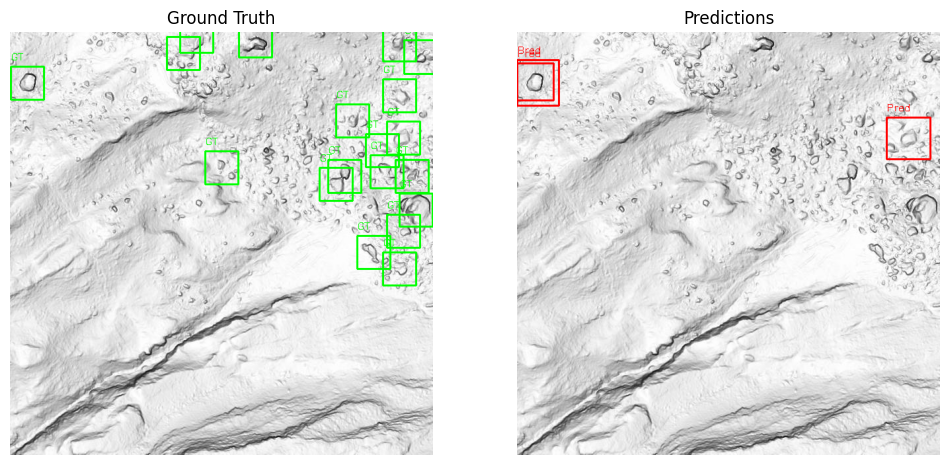

/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/model/Rock_detetection_hillshade32/labels/2581_1127_0_2.txt
No predictions found for 2581_1127_0_2.txt
/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/model/Rock_detetection_hillshade32/labels/2587_1133_3_2.txt


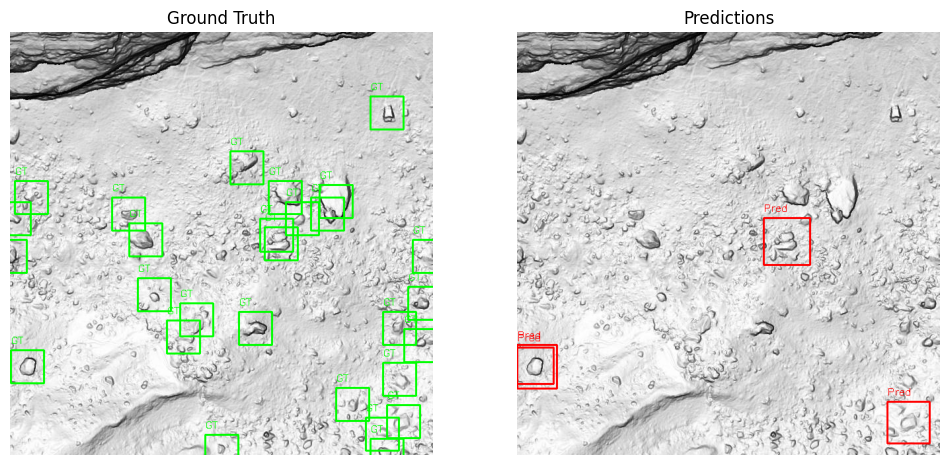

/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/model/Rock_detetection_hillshade32/labels/2589_1133_0_3.txt


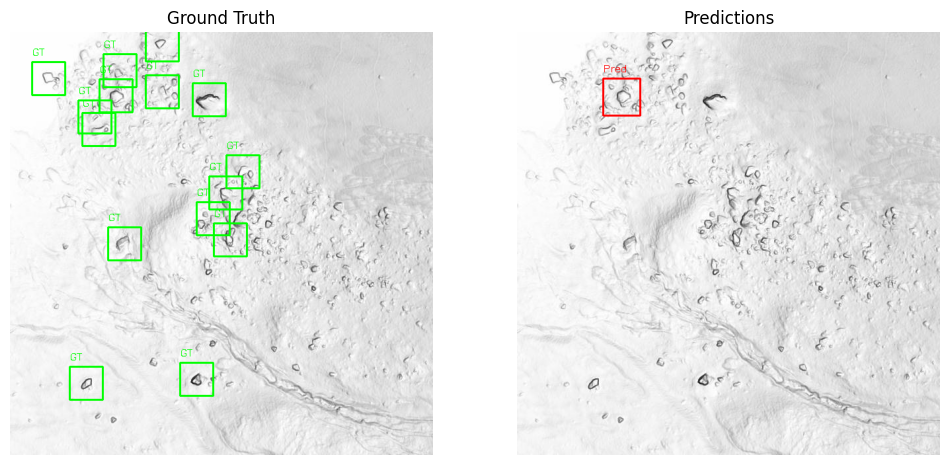

/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/model/Rock_detetection_hillshade32/labels/2593_1129_0_0.txt
No predictions found for 2593_1129_0_0.txt
/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/model/Rock_detetection_hillshade32/labels/2581_1126_3_2.txt


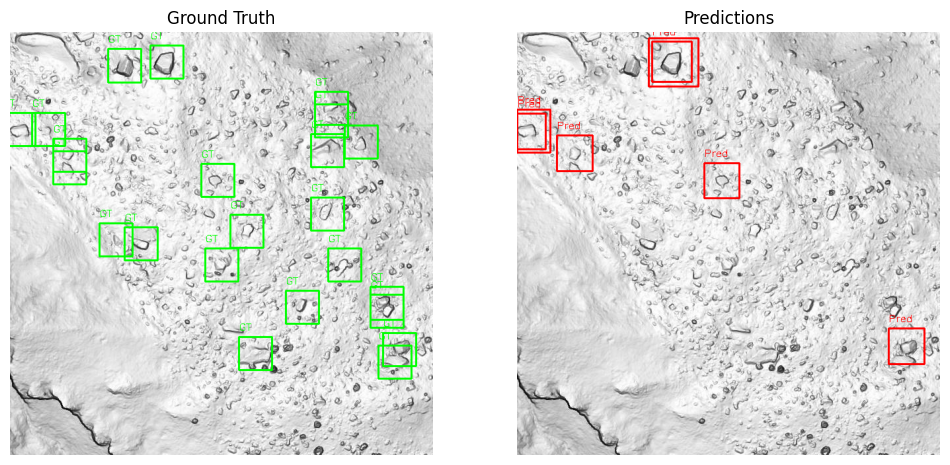

/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/model/Rock_detetection_hillshade32/labels/2581_1126_1_2.txt


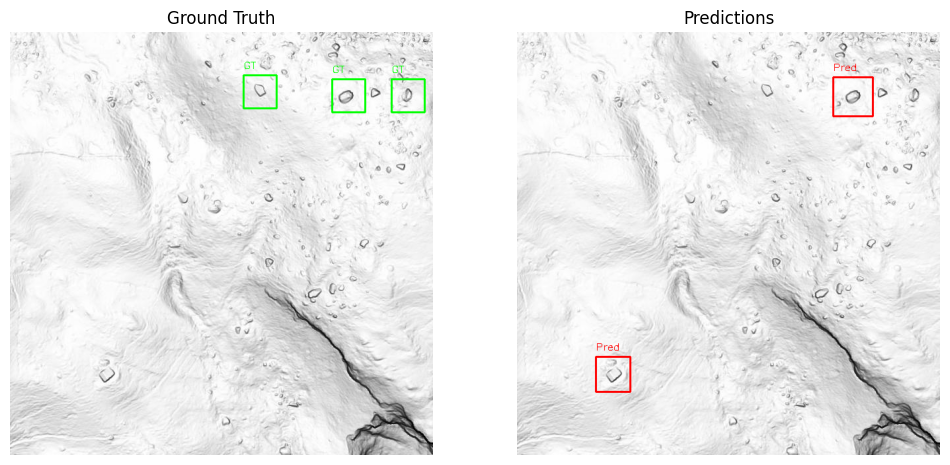

/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/model/Rock_detetection_hillshade32/labels/2583_1127_3_3.txt
No predictions found for 2583_1127_3_3.txt
/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/model/Rock_detetection_hillshade32/labels/2665_1136_1_3.txt


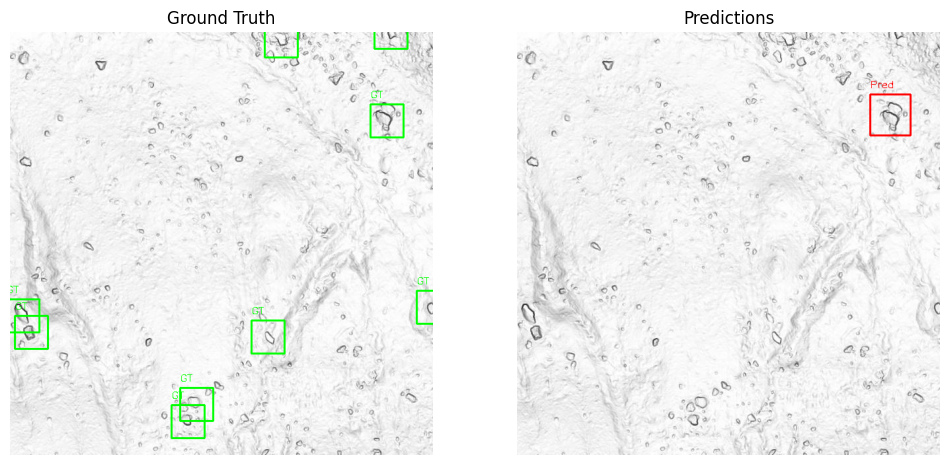

/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/model/Rock_detetection_hillshade32/labels/2614_1140_2_2.txt


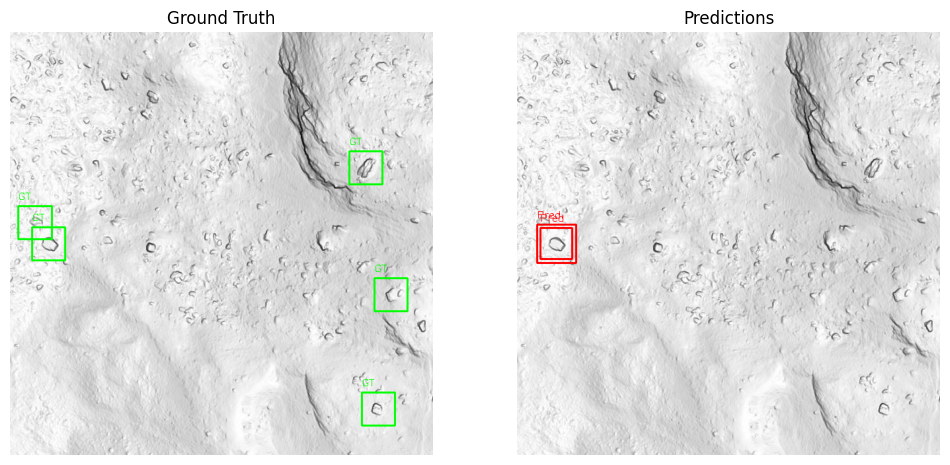

/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/model/Rock_detetection_hillshade32/labels/2582_1126_2_2.txt
No predictions found for 2582_1126_2_2.txt
/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/model/Rock_detetection_hillshade32/labels/2632_1144_0_0.txt
No predictions found for 2632_1144_0_0.txt
/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/model/Rock_detetection_hillshade32/labels/2582_1126_1_1.txt


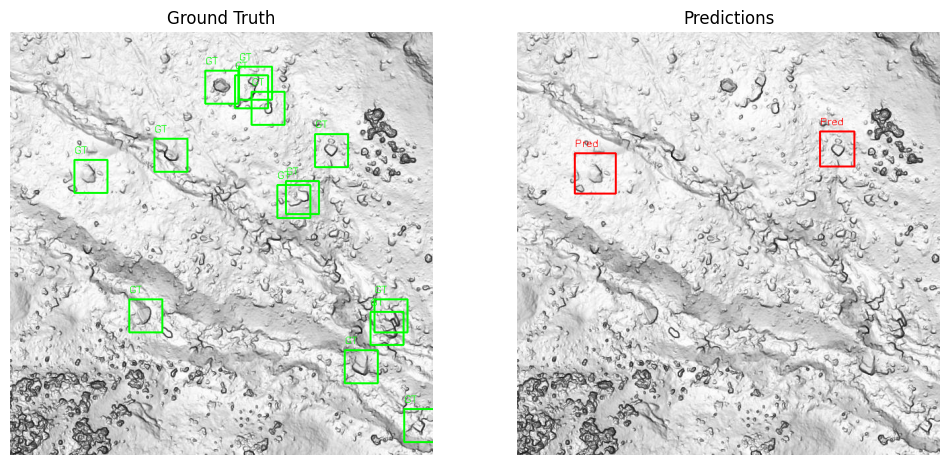

/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/model/Rock_detetection_hillshade32/labels/2594_1132_0_3.txt
No predictions found for 2594_1132_0_3.txt
/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/model/Rock_detetection_hillshade32/labels/2597_1131_3_1.txt
No predictions found for 2597_1131_3_1.txt
/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/model/Rock_detetection_hillshade32/labels/2597_1131_2_1.txt


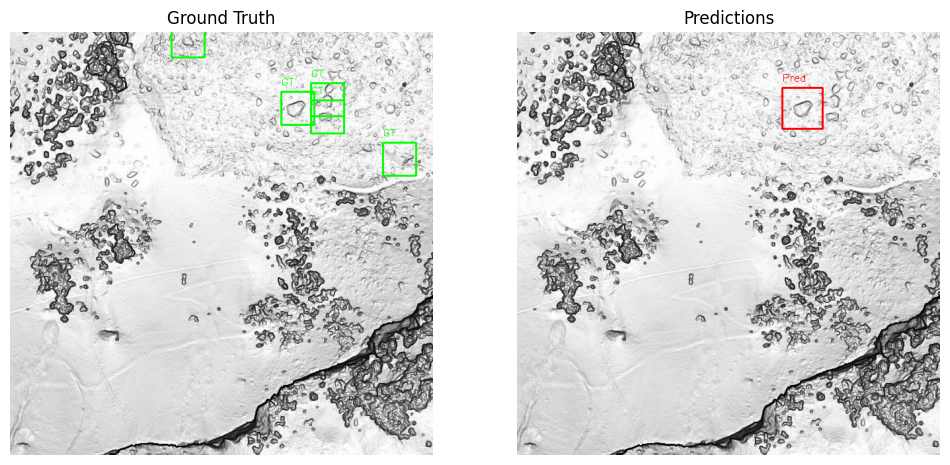

/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/model/Rock_detetection_hillshade32/labels/2598_1131_0_0.txt


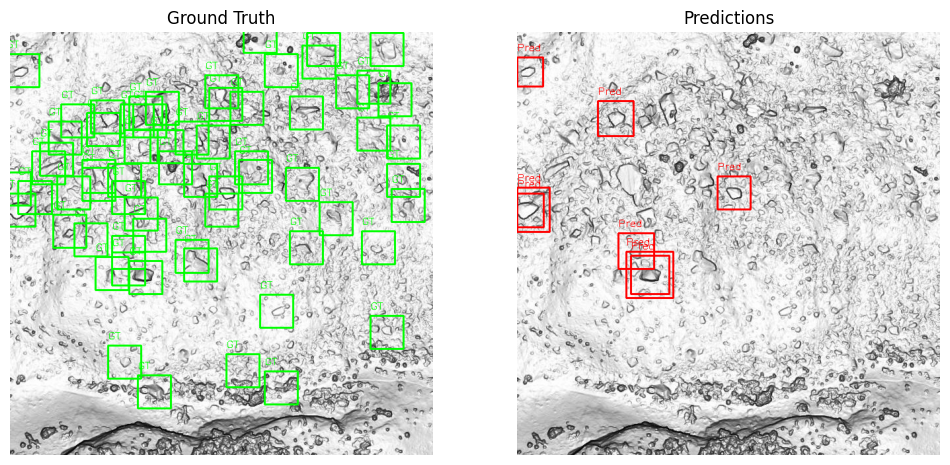

/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/model/Rock_detetection_hillshade32/labels/2598_1131_2_1.txt


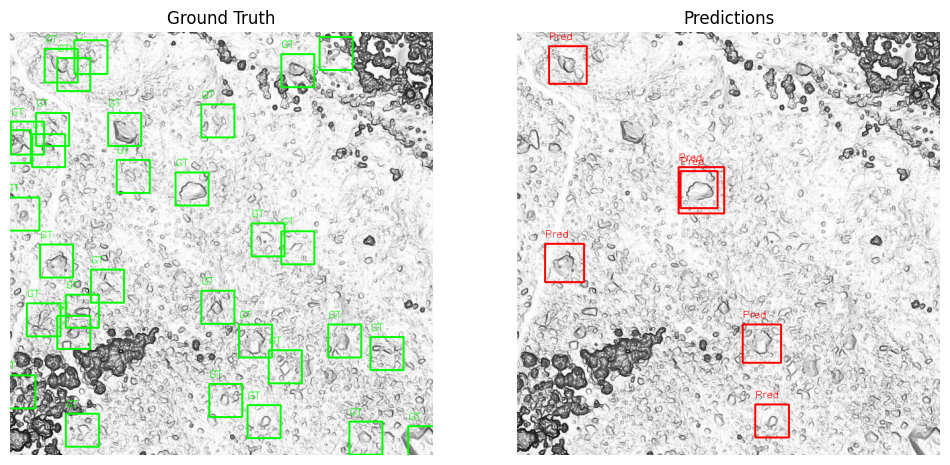

/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/model/Rock_detetection_hillshade32/labels/2595_1132_0_1.txt


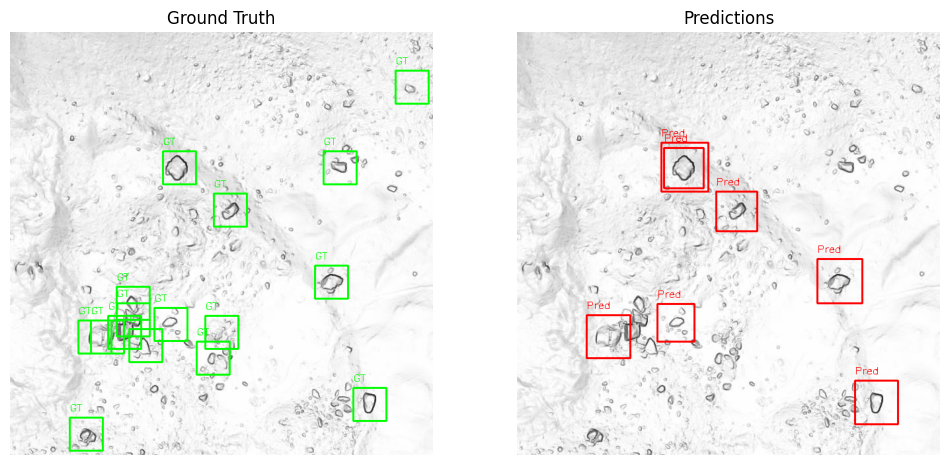

/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/model/Rock_detetection_hillshade32/labels/2595_1132_1_1.txt


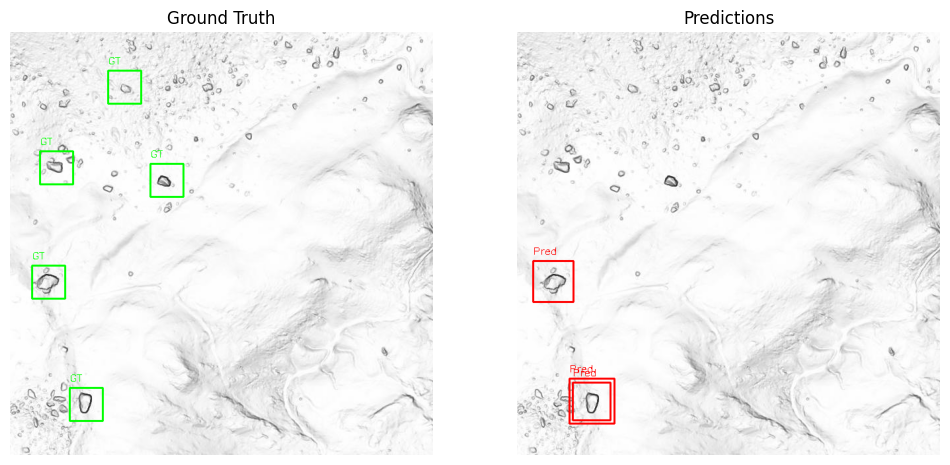

/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/model/Rock_detetection_hillshade32/labels/2598_1131_3_3.txt
No predictions found for 2598_1131_3_3.txt
/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/model/Rock_detetection_hillshade32/labels/2598_1131_3_1.txt


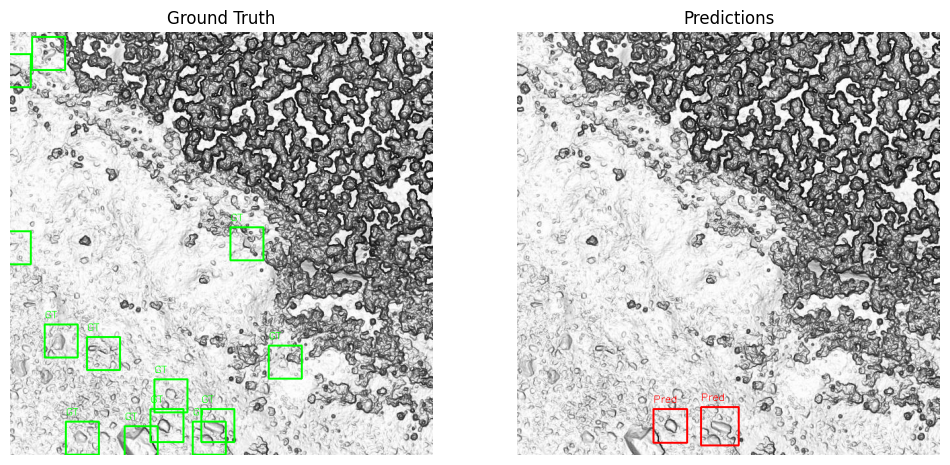

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Paths
val_images_path = '/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/val/images'
val_labels_path = '/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/val/labels'
predicted_images_path = '/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/model/Rock_detetection_hillshade32'
predicted_labels_path = '/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/model/Rock_detetection_hillshade32/labels'

# Helper function to load YOLO labels
def load_yolo_labels(label_file):
    with open(label_file, 'r') as f:
        lines = f.readlines()
    return [list(map(float, line.strip().split())) for line in lines]

# Helper function to draw bounding boxes
def draw_boxes(image, boxes, color, label_type=""):
    h, w, _ = image.shape
    for box in boxes:
        x_center, y_center, width, height = box[1:5]  # YOLO format: <class_id> <x_center> <y_center> <width> <height>
        x1 = int((x_center - width / 2) * w)
        y1 = int((y_center - height / 2) * h)
        x2 = int((x_center + width / 2) * w)
        y2 = int((y_center + height / 2) * h)
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        cv2.putText(image, f"{label_type}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

# Iterate over validation set
for label_file in os.listdir(val_labels_path):
    label_path = os.path.join(val_labels_path, label_file)
    # Check if the label file contains more than one label
    labels = load_yolo_labels(label_path)
    if len(labels) > 1:
        # Load the corresponding image
        image_file = label_file.replace('.txt', '.jpg')  # Assuming images are .jpg
        image_path = os.path.join(val_images_path, image_file)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Draw ground truth boxes
        ground_truth_image = image.copy()
        draw_boxes(ground_truth_image, labels, color=(0, 255, 0), label_type="GT")  # Green for ground truth

        # Load the model's predictions
        pred_label_path = os.path.join(predicted_labels_path, label_file)
        print(pred_label_path)
        if os.path.exists(pred_label_path):
            predictions = load_yolo_labels(pred_label_path)
            predicted_image = image.copy()
            draw_boxes(predicted_image, predictions, color=(255, 0, 0), label_type="Pred")  # Red for predictions
        else:
            print(f"No predictions found for {label_file}")
            continue

        # Plot side by side
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        axes[0].imshow(ground_truth_image)
        axes[0].set_title("Ground Truth")
        axes[0].axis('off')

        axes[1].imshow(predicted_image)
        axes[1].set_title("Predictions")
        axes[1].axis('off')

        plt.show()


# Let's make the model better

In [ ]:
model = YOLO(model_directory + '/Rock_detetection_hillshade2/weights/best.pt')

In [ ]:
model.train(
    data=model_training_path,# Path to the dataset
    epochs=50,               # Number of training epochs
    imgsz=640,               # Image size for training
    batch=16,                # Batch size
    lr0 = 0.001,
    patience = 10,
    augment = True,
    amp = True,
    name=model_name, # Name of the training run
    project=model_directory,  # Directory to save training results
    workers=4                # Number of data loader workers
)

Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo//model/Rock_detetection_hillshade2/weights/best.pt, data=/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade//dataset.yaml, epochs=50, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=/content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo//model, name=Rock_detetection_hillshade3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn

train: Scanning /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/train/labels.cache... 576 images, 283 backgrounds, 0 corrupt: 100%|██████████| 576/576 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/train/images/2582_1127_0_1.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/train/images/2588_1133_0_2.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/train/images/2588_1133_1_2.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/train/images/2598_1132_0_3.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/train/images/2598_1132_1_3.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_h


val: Scanning /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/Data/dataset_surface_hillshade/val/labels.cache... 64 images, 37 backgrounds, 0 corrupt: 100%|██████████| 64/64 [00:00<?, ?it/s]


Plotting labels to /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/model/Rock_detetection_hillshade3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/model/Rock_detetection_hillshade3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       6.8G      2.074      2.357      1.729        141        640: 100%|██████████| 36/36 [00:22<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]

                   all         64        292      0.373      0.408      0.365      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      6.88G      2.116      2.414      1.739         76        640: 100%|██████████| 36/36 [00:23<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all         64        292       0.22      0.188       0.12     0.0343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      6.78G       2.01      2.221      1.699        158        640: 100%|██████████| 36/36 [00:21<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         64        292     0.0312      0.325      0.156     0.0595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      6.84G      2.073      2.271      1.714         89        640: 100%|██████████| 36/36 [00:21<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]

                   all         64        292      0.551      0.479      0.466      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      6.91G      2.127      2.381      1.712         75        640: 100%|██████████| 36/36 [00:22<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         64        292      0.256      0.307       0.19     0.0673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      6.86G      2.044      2.261      1.675         55        640: 100%|██████████| 36/36 [00:20<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]

                   all         64        292    0.00613     0.0274    0.00076   0.000113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      6.87G      2.122      2.172      1.723         68        640: 100%|██████████| 36/36 [00:20<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all         64        292     0.0234      0.517       0.02     0.0107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      6.85G      1.911      2.298       1.59         99        640: 100%|██████████| 36/36 [00:20<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all         64        292      0.515       0.44      0.453      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      6.85G       1.95      2.201      1.621         97        640: 100%|██████████| 36/36 [00:22<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         64        292      0.546      0.466      0.491      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      6.85G      2.021      2.115      1.642        152        640: 100%|██████████| 36/36 [00:21<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         64        292      0.512      0.481      0.457      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      6.86G      1.886      2.018      1.542        152        640: 100%|██████████| 36/36 [00:21<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         64        292      0.556      0.442       0.47      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      6.83G      1.925      2.124      1.591         99        640: 100%|██████████| 36/36 [00:21<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         64        292      0.307      0.324      0.236     0.0565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      6.83G      1.976      2.113      1.588        100        640: 100%|██████████| 36/36 [00:20<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]

                   all         64        292      0.305      0.418      0.301      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      6.87G      1.961      2.095       1.57        102        640: 100%|██████████| 36/36 [00:20<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]

                   all         64        292      0.658      0.467      0.551      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      6.87G      1.917       2.01      1.547        146        640: 100%|██████████| 36/36 [00:21<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]

                   all         64        292      0.637      0.379      0.499      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      6.65G      1.923      2.047      1.529        137        640: 100%|██████████| 36/36 [00:21<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]

                   all         64        292      0.639      0.483      0.566      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      7.12G      1.832      1.984      1.512        120        640: 100%|██████████| 36/36 [00:21<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.99it/s]

                   all         64        292      0.624      0.483      0.538      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      6.85G      1.877      1.988      1.533         76        640: 100%|██████████| 36/36 [00:21<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all         64        292      0.624        0.5       0.53       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      6.84G      1.873      1.959       1.52        167        640: 100%|██████████| 36/36 [00:21<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         64        292      0.545      0.476      0.475      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      6.83G      1.837      2.029      1.535        118        640: 100%|██████████| 36/36 [00:21<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         64        292      0.632      0.241      0.358      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      6.83G      1.874      1.978      1.544         93        640: 100%|██████████| 36/36 [00:20<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         64        292      0.139      0.188     0.0833     0.0134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      6.87G      1.885      2.016      1.562        202        640: 100%|██████████| 36/36 [00:21<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         64        292      0.546      0.503      0.534      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      6.88G      1.799      2.003      1.484         72        640: 100%|██████████| 36/36 [00:21<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         64        292      0.456      0.421      0.381      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      6.83G      1.772      1.924      1.469        154        640: 100%|██████████| 36/36 [00:20<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]

                   all         64        292      0.435      0.229      0.239     0.0471
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 14, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



24 epochs completed in 0.166 hours.
Optimizer stripped from /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/model/Rock_detetection_hillshade3/weights/last.pt, 52.0MB
Optimizer stripped from /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/model/Rock_detetection_hillshade3/weights/best.pt, 52.0MB

Validating /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/model/Rock_detetection_hillshade3/weights/best.pt...
Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]


                   all         64        292      0.526      0.456      0.445      0.229
Speed: 0.3ms preprocess, 26.2ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to /content/drive/My Drive/epfl/MA3/Image processing/PROJET/project_ipeo/model/Rock_detetection_hillshade3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e6790247880>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 